In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
df = pd.read_csv ('/Users/Helen/Desktop/titanic/train.csv')
y_test = pd.read_csv ('/Users/Helen/Desktop/titanic/gender_submission.csv')
y_test = y_test.drop(['PassengerId'],axis=1,inplace=True)
X_test = pd.read_csv ('/Users/Helen/Desktop/titanic/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


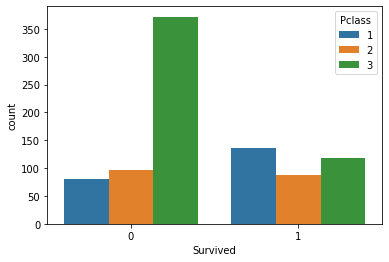

In [2]:
sns.countplot(x='Survived',hue='Pclass',data=df)

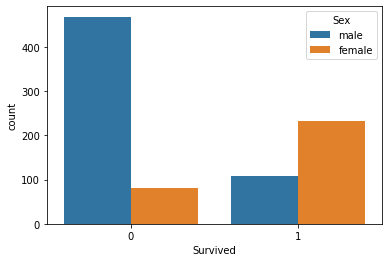

In [3]:
sns.countplot(x='Survived',hue='Sex',data=df)

/Users/Helen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Helen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

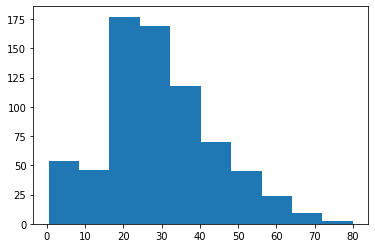

In [4]:
plt.hist(df['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

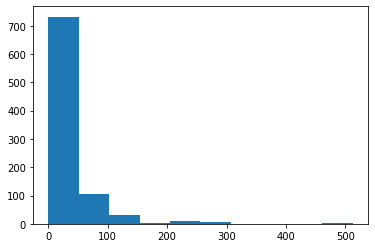

In [5]:
plt.hist(df['Fare'])

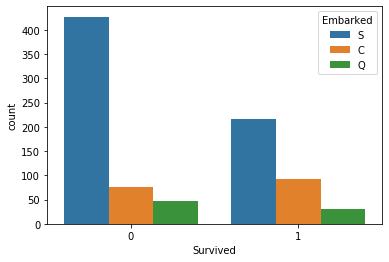

In [6]:
sns.countplot(x='Survived',hue='Embarked',data=df)

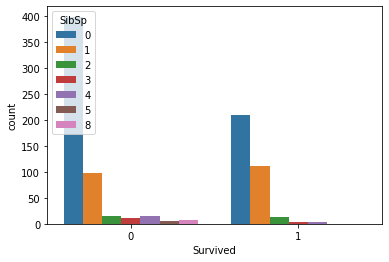

In [7]:
sns.countplot(x='Survived',hue='SibSp',data=df)

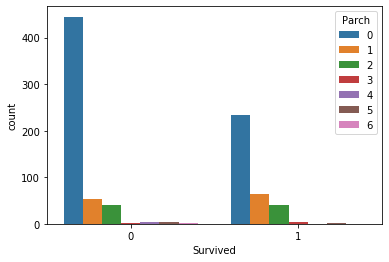

In [8]:
sns.countplot(x='Survived',hue='Parch',data=df)

In [9]:
# Ticket, Name, and PassengerId can be dropped

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.drop('Cabin',axis=1,inplace=True)
X_test.drop('Cabin',axis=1,inplace=True)

In [12]:
df.fillna(df['Age'].mean(),inplace=True)
X_test.fillna(df['Age'].mean(),inplace=True)

In [13]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)

In [14]:
df.dropna(inplace=True)
X_test.dropna(inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
sex=pd.get_dummies(df['Sex'])
pclass=pd.get_dummies(df['Pclass'])
embarked=pd.get_dummies(df['Embarked'])
df=pd.concat([df,sex,pclass,embarked],axis=1)
df.drop(['Name','Ticket','Sex','Pclass','Embarked'],axis=1,inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Age                891 non-null    float64
 3   SibSp              891 non-null    int64  
 4   Parch              891 non-null    int64  
 5   Fare               891 non-null    float64
 6   female             891 non-null    uint8  
 7   male               891 non-null    uint8  
 8   1                  891 non-null    uint8  
 9   2                  891 non-null    uint8  
 10  3                  891 non-null    uint8  
 11  29.69911764705882  891 non-null    uint8  
 12  C                  891 non-null    uint8  
 13  Q                  891 non-null    uint8  
 14  S                  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(9)
memory usage: 56.6 KB


In [18]:
df.drop([df.columns[11]], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [19]:
sex1=pd.get_dummies(X_test['Sex'])
pclass1=pd.get_dummies(X_test['Pclass'])
embarked1=pd.get_dummies(X_test['Embarked'])
X_test=pd.concat([X_test,sex1,pclass1,embarked1],axis=1)
X_test.drop(['Name','Ticket','Sex','Pclass','Embarked'],axis=1,inplace=True)
X_test.head()

,PassengerId,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,892,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [20]:
y_train=df['Survived']
X_train=df.drop(['Survived'],axis=1)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [22]:
lr.fit(X_train, y_train)

/Users/Helen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr.score(X_test,y_test)

ValueError: Expected array-like (array or non-string sequence), got None